In [31]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [32]:
import sys
#sys.path.append('/data/tjarniko/MEOPAR/mocsy')
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/VIZ')
sys.path.append('/data/tjarniko/MEOPAR/tools/SalishSeaTools/salishsea_tools/')
import mocsy
import river_201702 as rv
import VIZ_plots as VP

import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import seawater as sw
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt
from matplotlib import reload
plt.style.use('seaborn-bright')
import netCDF4 as nc
import numpy as np
import cmocean as cm

""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

%matplotlib inline

## Rivers we have data for and their watersheds

In [33]:

watersheds = rv.prop_dict.keys()
riv_i = []
riv_j = []
riv_shed = []
riv_name = []
i = 0
for watshed in watersheds:
    #print('~~')
    rivs = rv.prop_dict[watshed].keys()
    for riv in rivs:
        ti = rv.prop_dict[watshed][riv]['j']
        tj = rv.prop_dict[watshed][riv]['i']
        riv_i.append(ti)
        riv_j.append(tj)
        riv_shed.append(watshed)
        riv_name.append(riv)
        i = i+1


gauge_riv = ['Squamish','SanJuan','Elwha','DungenessMatriotti','Hoko','LittleBigQuilcene',\
            'Duckabush','Skokomish','DeerJohnsGoldboroughMill','Deschutes','Chambers',\
            'Chambers','NisquallyMcAllister','Puyallup','CedarSammamish','Skagit1',\
            'Samish','Stillaguamish1','SnohomishAllenQuilceda','Tulalip','Mission',\
            'Nooksack','Fraser','Oyster','Qunisam','SalmonSayward','Theodosia',
             'Homathko','Cowichan1','Chemanius1','Nanaimo1','Englishman',
             'LittleQualicum','Puntledge']

cols = ['darkgray','red','powderblue','tan','orange',\
    'navy','palegreen','mediumaquamarine','dodgerblue','violet']
watersheds = ['howe', 'jdf', 'puget', 'skagit', 'fraser', 'evi_n', 'jervis', 'toba', 'bute', 'evi_s']

In [34]:
#'/results/forcing/rivers/R201702DFraCElse_


ro_2015 = np.zeros([365,898,398])
import arrow
start = '2015-01-01'
end = '2015-12-31'

start_run = arrow.get(start)
end_run = arrow.get(end)
arrow_array = []
nc_ar = []
for r in arrow.Arrow.span_range('day', start_run, end_run):
    arrow_array.append(r)
    
for i in range(0,len(arrow_array)):
    tdate = arrow_array[i][0]
    yy = tdate.format('YYYY')
    mm = tdate.format('MM')
    dd = tdate.format('DD')
    tstr = f"/results/forcing/rivers/R201702DFraCElse_y{yy}m{mm}d{dd}.nc"
    nc_ar.append(tstr)

for i in range(0,365):
#     if i%20 ==0:
#         print(i)
    t_nc = nc.Dataset(nc_ar[i])
    ro = (np.squeeze(t_nc['rorunoff'][:,:,:]))
    ro_2015[i,:,:] = ro

In [35]:
tnc = nc.Dataset('/results/SalishSea/hindcast.201812/09may15/SalishSea_1d_20150509_20150509_grid_T.nc')
print(tnc)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    name: SalishSea_1d_20150501_20150510
    description: ocean T grid variables
    title: ocean T grid variables
    Conventions: CF-1.6
    timeStamp: 2018-Dec-30 10:04:43 GMT
    uuid: 524cd807-5ce1-4d3f-b0cd-56b502c514d6
    dimensions(sizes): axis_nbounds(2), x(398), y(898), nvertex(4), deptht(40), time_counter(1)
    variables(dimensions): float32 nav_lat(y,x), float32 nav_lon(y,x), float32 bounds_lon(y,x,nvertex), float32 bounds_lat(y,x,nvertex), float32 area(y,x), float32 deptht(deptht), float32 deptht_bounds(deptht,axis_nbounds), float32 sossheig(time_counter,y,x), float64 time_centered(time_counter), float64 time_centered_bounds(time_counter,axis_nbounds), float64 time_counter(time_counter), float64 time_counter_bounds(time_counter,axis_nbounds), float32 votemper(time_counter,deptht,y,x), float32 vosaline(time_counter,deptht,y,x)
    groups: 



In [36]:
tnc = nc.Dataset('/data/tjarniko/results/SAMPL/SalishSea_1ts_20141121_20141121_grid_T_20141121-20141121.nc')
tnc2 = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
e1t = tnc2.variables['e1t']
e2t = tnc2.variables['e2t']
print(e1t[0,500,20])


435.3644908755905


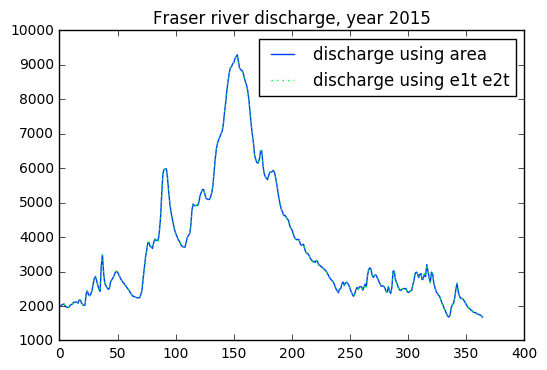

In [37]:
# #  Hi Tereza,
# #  I'm not the least surprised that you are confused.  Rivers are treated like rain, added from above.  So kg of water/m2 /s where the m2 is horizontal area.  This we will call nf (nemo flux)

# # So for m3/s first we convert from mass to volume

# # nf / rho (fresh water so 1000 kg/m3)  so now we have m/s

# # Then multiply by the area of the grid cell

# # nf  / rho * e1t(i,j) *e2t(i,j)
watersheds = rv.prop_dict.keys()
riv_i = []
riv_j = []
riv_shed = []
riv_name = []
i = 0
for watshed in watersheds:
    rivs = rv.prop_dict[watshed].keys()
    for riv in rivs:
        ti = rv.prop_dict[watshed][riv]['j']
        tj = rv.prop_dict[watshed][riv]['i']
        riv_i.append(ti)
        riv_j.append(tj)
        riv_shed.append(watshed)
        riv_name.append(riv)
        i = i+1
        
tnc = nc.Dataset('/data/tjarniko/results/SAMPL/SalishSea_1ts_20141121_20141121_grid_T_20141121-20141121.nc')
tnc2 = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')

#93 is 
for r in range(93,94):
    ti = riv_i[r]
    tj = riv_j[r]
    runoff = ro_2015[:,tj,ti]
    t_area = (tnc.variables['area'][tj,ti])
    year_runoff_use_area = (runoff / 1000) * t_area
    e1t = tnc2.variables['e1t']
    e2t = tnc2.variables['e2t']
    
    year_runoff_use_et = (runoff/ 1000) * e1t[0,tj,ti] *e2t[0,tj,ti]
plt.plot(year_runoff_use_area, label = 'discharge using area')
plt.plot(year_runoff_use_et, linestyle = ':', label = 'discharge using e1t e2t')
plt.legend()
plt.title('Fraser river discharge, year 2015')